In [8]:
from main import *
import pandas as pd

Below an example of how a classical predator-prey simulation would look like with positive parameters.

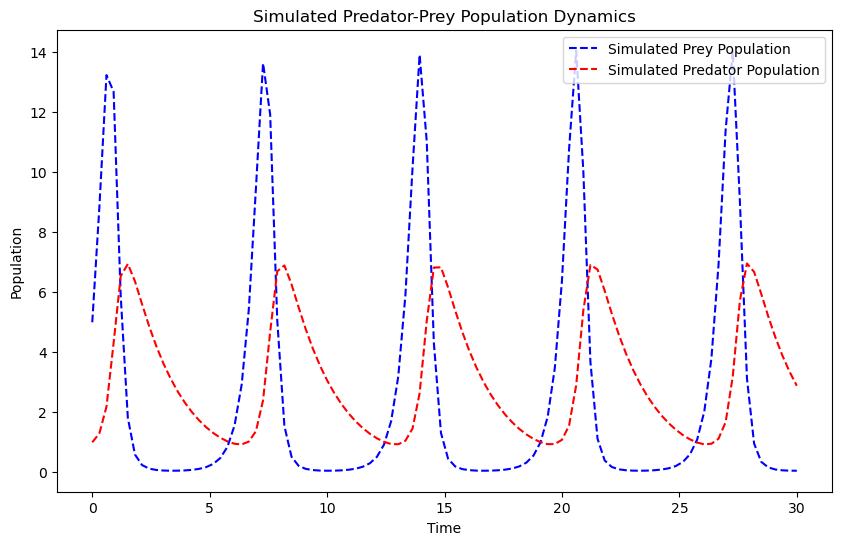

In [9]:
alpha = 3
beta = 1
delta = .2
gamma = .5
params = (alpha,
          beta,
          delta,
          gamma)
y_0 = np.array([5,1]) # initial population
t = np.linspace(0,30,100)
simulated = odeint(lv_system, y_0, t, args=params)
x = simulated[:,0]
y = simulated[:,1]

plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b--',label='Simulated Prey Population')
plt.plot(t, y, 'r--',label='Simulated Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Simulated Predator-Prey Population Dynamics')
plt.legend(loc='upper right')
plt.show()
T = 2*np.pi/np.sqrt(alpha*gamma)

Display the loaded data to know what it looks like and plot it

In [10]:
data

,t,x,y
0,0.000000,4.781635,3.035257
1,0.202020,6.114005,2.189746
2,0.404040,6.238361,1.478907
3,0.606061,5.520524,0.989836
4,0.808081,4.582546,0.957827
...,...,...,...
95,19.191919,0.310346,1.241890
96,19.393939,0.324595,1.437257
97,19.595960,0.258083,1.562810
98,19.797980,0.283680,1.834171


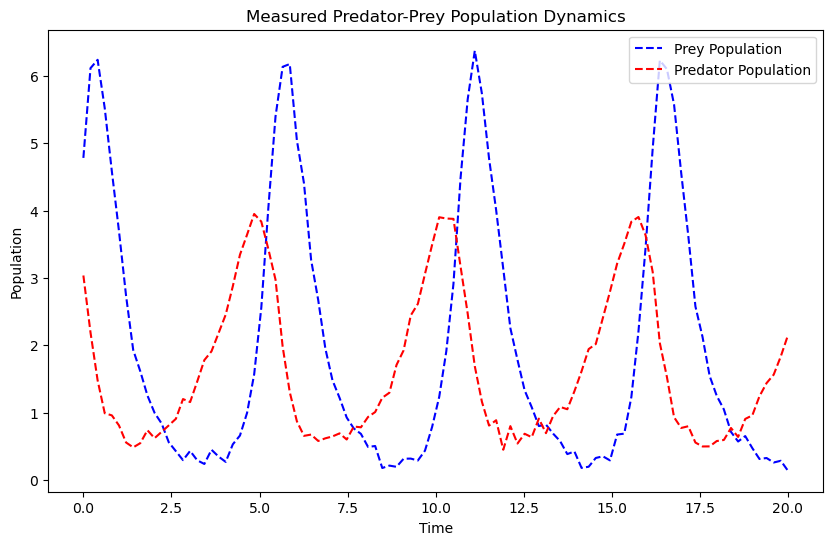

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['t'],data['x'],'b--',label='Prey Population')
plt.plot(data['t'],data['y'],'r--',label='Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Measured Predator-Prey Population Dynamics')
plt.legend(loc='upper right')
plt.show()

Starting Parameters: [-1.         -0.58946135 -0.39533502 -1.46000065]


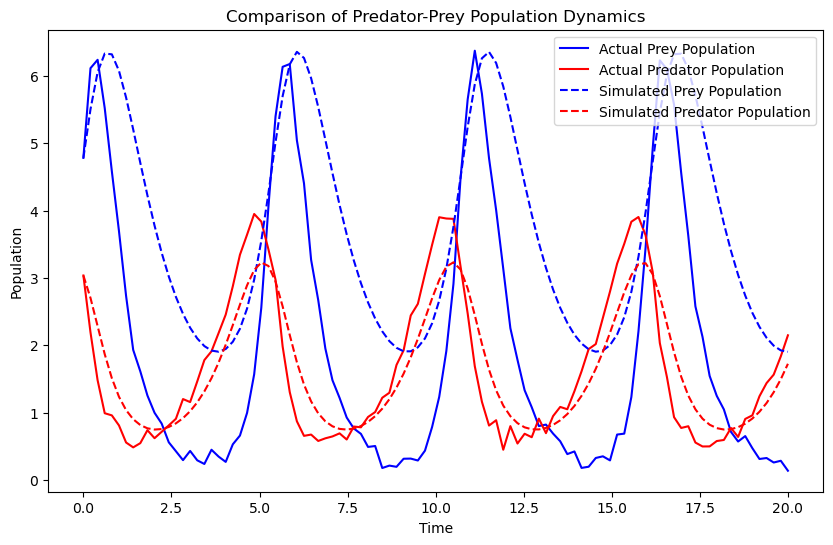

In [12]:
# initial guesses and approximations
T = 5.2 
alpha = -1
beta = alpha/data['y'][0]-0.26 
gamma = 1/alpha * (2*np.pi/T)**2
delta = gamma/data['x'][0]-0.09
starting = np.array([alpha,beta,delta,gamma])
print("Starting Parameters:", starting)
plot_sim( np.array([alpha,beta,delta,gamma]),data)

In [65]:
starting = np.array([alpha,beta,delta,gamma]) # initial guesses
starting = np.array([-2.02748912, -1.13671319, -0.44162828, -0.84144125]) # initial guess from previous fitting runs
print("Starting Parameters:", starting)
temp = 8

for i in range(1):
    
    optimized_params =optimize_parameters(data,method = 'simulated_annealing', func='mae', i=5000, temp = temp, array= starting)
    print("Optimized Parameters:", optimized_params)
    sse_error, mae_error = calculate_errors(optimized_params, data)
    print("Error (SSE) between simulated and original data:", sse_error)
    print("Error (MAE) between simulated and original data:", mae_error)
    starting = optimized_params
    #plot_sim(optimized_params, data)
    if i>0:
        if previous_error<=mae_error:
            temp*=2
            print('temperature increased')
        else:
            temp/=2
            print('temperature decreased')
    previous_error = mae_error
    print(np.shape(sim_lv(optimized_params,data['t'])))


Starting Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]


c:\Users\bruno\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: overflow encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: divide by zero encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():


Optimized Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]
Error (SSE) between simulated and original data: 2.994004075138656
Error (MAE) between simulated and original data: 0.1897823707369809
(100, 2)


In [119]:
# Example real data (replace with your actual observed data)
time_steps = data['t']
observed_predators = data['x']
observed_prey = data['y']

# Number of simulations
num_simulations = 10

starting = np.array([alpha,beta,delta,gamma])
alpha = -2

# Example simulated data (replace with your actual simulated data)
num_simulations = 10
simulated_populations = [sim_lv(optimize_parameters(data,method = 'simulated_annealing', func='mae', i=5000, temp = temp, array= starting), time_steps) for _ in range(num_simulations)]
print(np.shape(simulated_populations))



c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: overflow encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: divide by zero encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():


(10, 100, 2)


(100, 2)
[[4.78163509 3.03525736]
 [5.63029916 2.10836042]
 [5.62292066 1.38704539]
 [5.01966297 0.93673011]
 [4.19604246 0.68692035]
 [3.38263879 0.55391031]
 [2.62239436 0.4873999 ]
 [1.98126985 0.46125391]
 [1.49252317 0.46246481]
 [1.12927482 0.4848278 ]
 [0.86251481 0.52579249]
 [0.66806784 0.58493726]
 [0.52716608 0.66322922]
 [0.42583022 0.76266636]
 [0.35396996 0.88610683]
 [0.30456147 1.03718165]
 [0.27303396 1.2202209 ]
 [0.25692577 1.4401201 ]
 [0.25588674 1.70203361]
 [0.2722055  2.0106786 ]
 [0.31228851 2.34717192]
 [0.39007346 2.7009301 ]
 [0.53451295 3.07620538]
 [0.8049881  3.4380281 ]
 [1.31672274 3.67941507]
 [2.23120633 3.67254648]
 [3.62701715 3.35604223]
 [5.1427253  2.64024993]
 [5.71673289 1.7904961 ]
 [5.47401748 1.19246807]
 [4.76433917 0.82880572]
 [3.92663407 0.62890057]
 [3.08602204 0.52406464]
 [2.37518145 0.47421922]
 [1.80242637 0.45896644]
 [1.35895187 0.46826716]
 [1.03090065 0.49748456]
 [0.79066958 0.54495681]
 [0.61591019 0.61082151]
 [0.4895456  0.6

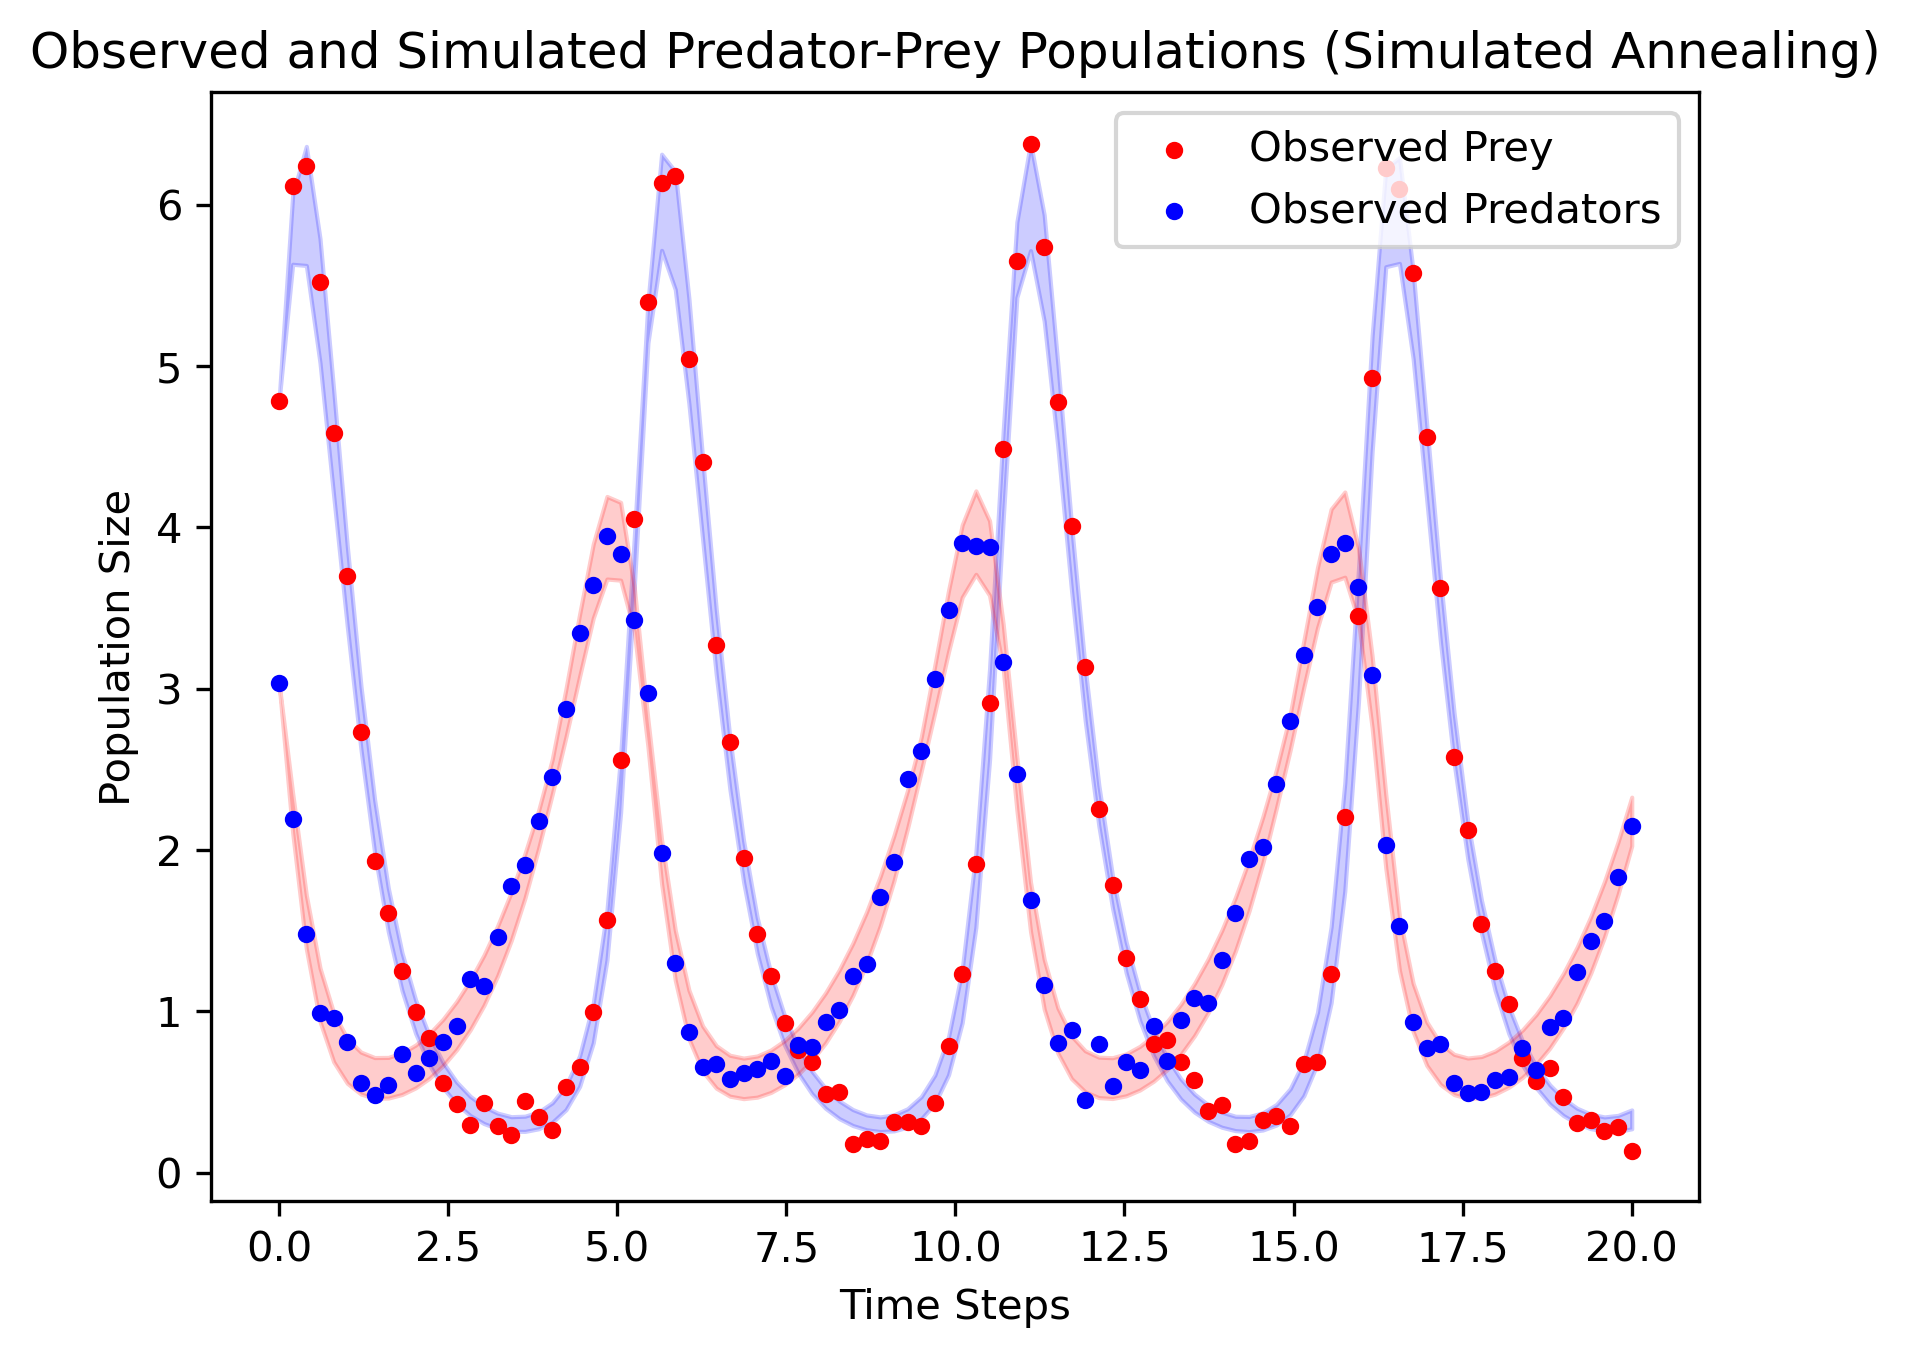

In [120]:
min, max = np.ones(simulated_populations[0].shape)*1000, np.zeros(simulated_populations[0].shape)

print(np.shape(min))
for sim in simulated_populations:
    for idx, (i,j) in enumerate(sim):
        if i < min[idx,0]:
            min[idx,0] = i
        if i > max[idx,0]:
            max[idx,0] = i
        if j > max[idx,1]:
            max[idx,1] = j
        if j < min[idx,1]:
            min[idx,1] = j

print(min)

fig, ax = plt.subplots(dpi=300)
ax.fill_between(time_steps, min[:,0], max[:,0], color='blue', alpha=.2)
ax.fill_between(time_steps, min[:,1], max[:,1], color='red', alpha=.2)
ax.set_title('fill between y1 and 0')

#Plot observed data
plt.scatter(time_steps, observed_predators, label='Observed Prey', color='red',s=10)
plt.scatter(time_steps, observed_prey, label='Observed Predators', color='blue',s=10)	



#Customize plot labels, legend, etc.
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.title('Observed and Simulated Predator-Prey Populations (Simulated Annealing)')
plt.legend()
plt.show()

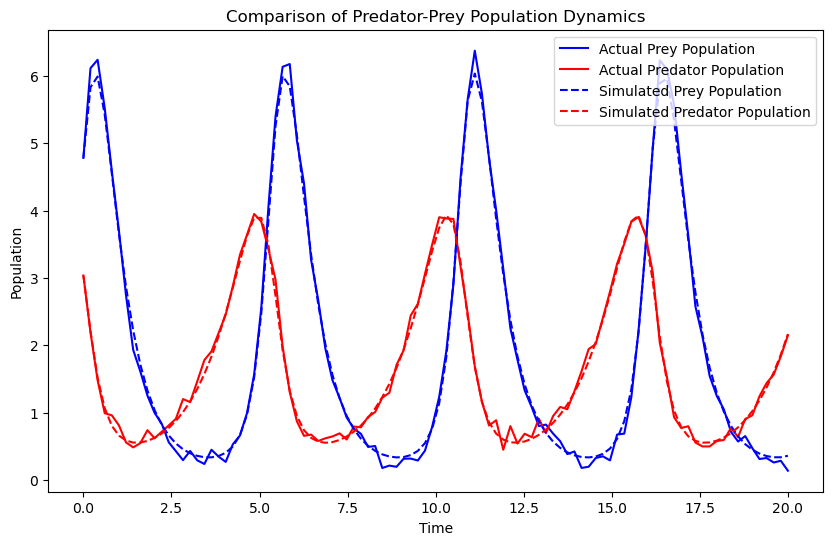

In [51]:
plot_sim(optimized_params, data)


[-2.02748912 -1.13671319 -0.44162828 -0.84144125]


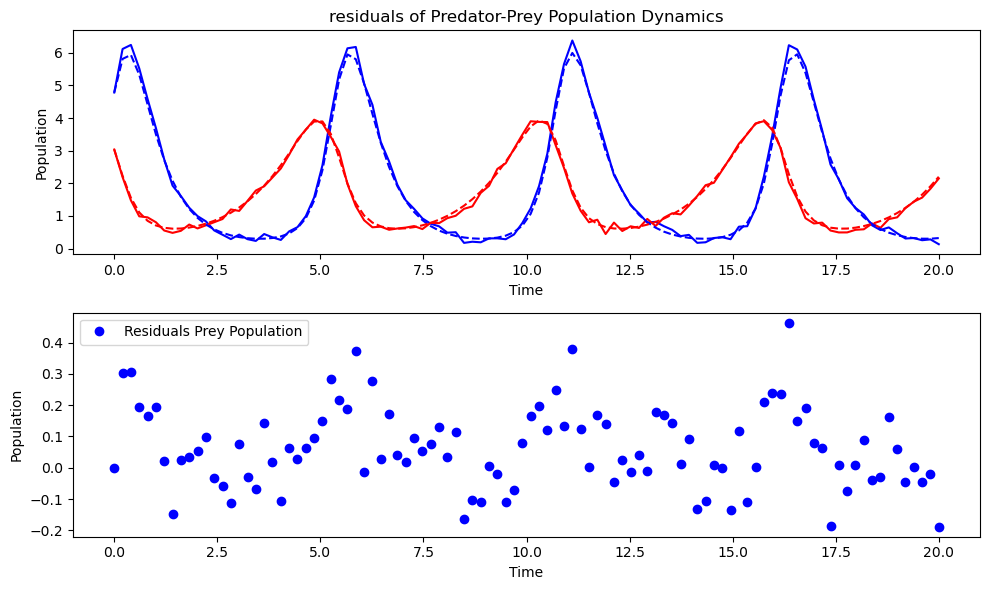

(2.994004075138656, 0.1897823707369809)


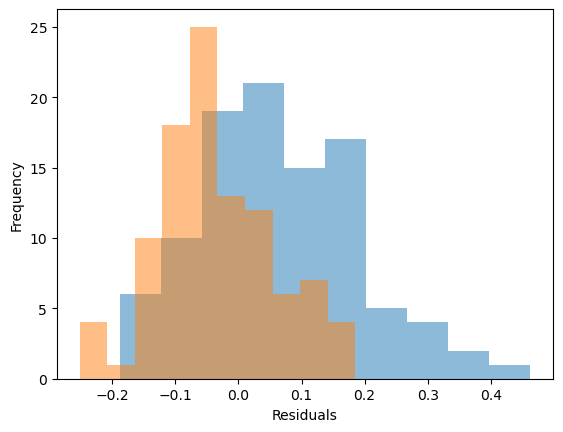

In [112]:
simulated = sim_lv(optimized_params, data['t'])
print(optimized_params)
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot(211)
ax2.plot(data['t'], data['x'], 'b-', label='Actual Prey Population')
ax2.plot(data['t'], data['y'], 'r-', label='Actual Predator Population')
ax2.plot(data['t'], simulated[:, 0], 'b--',
            label='Simulated Prey Population')
ax2.plot(data['t'], simulated[:, 1], 'r--',
            label='Simulated Predator Population')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.set_title('Comparison of Predator-Prey Population Dynamics')
ax1 = fig.add_subplot(212)
ax1.plot(data['t'], data['x']-simulated[:, 0], 'bo',
            label='Residuals Prey Population')
# ax1.plot(data['t'], data['y']-simulated[:, 1], 'ro',
#             label='Residuals Predator Population')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax2.set_title('residuals of Predator-Prey Population Dynamics')
ax1.legend()
plt.tight_layout()
plt.show()
print(calculate_errors(optimized_params, data))
plt.hist(data['x']-simulated[:, 0], bins=10,alpha = 0.5)
plt.hist(data['y']-simulated[:, 1], bins=10,alpha = 0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [53]:
from scipy import stats

contingency_table = np.array([
    [sum(data['y']), sum(simulated[:, 1])],
    [sum(data['x']), sum(simulated[:, 0])]
])

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Make a decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. The model fits well.")

Chi-square statistic: 0.0014856668932226366
P-value: 0.9692536717962031
Degrees of freedom: 1
Expected frequencies:
[[163.28764959 162.06448669]
 [201.72440224 200.21331549]]
Fail to reject the null hypothesis. The model fits well.


Optimized Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]
Error (SSE) between simulated and original data: 2.9940047922942243
Error (MAE) between simulated and original data: 0.18978238746664786


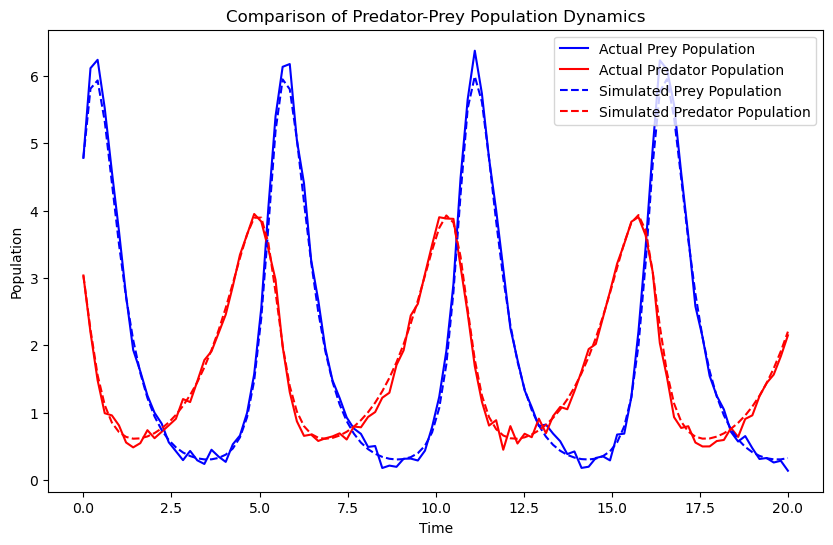

In [ ]:
i=0
starting = np.array([-2, -1.15, -0.4, -0.85]) # based on numerous runs
## choose hill_climbing or simulated_annealing and mae or sse
optimized_params =optimize_parameters(data,'hill_climbing', 'sse', 10000, 1, starting)
print("Optimized Parameters:", optimized_params)
sse_error, mae_error = calculate_errors(optimized_params, data)
print("Error (SSE) between simulated and original data:", sse_error)
print("Error (MAE) between simulated and original data:", mae_error)
starting = optimized_params
i +=1
plot_sim(optimized_params, data)


In [ ]:
def sim_dropped_pts(data,starting,dropped_pts,step=3):
    n_reps = 3
    og_starting = np.array([-2, -1.15, -0.4, -0.85])
    dropped_pts = 4
    fit_failed=False

    simrun_data =[]

    while not fit_failed:
        print(dropped_pts)
        error_n_dropped = (dropped_pts,
                        [],#errors
                        [], #parameters
                        )
        for i in range(n_reps):
            if i == 0:
                sse_min = sse
            
            data_copy = data.drop(data.sample(dropped_pts).index, inplace=False)
            optimized_params = optimize_parameters(data = data_copy ,i=5000,method='simulated_annealing',func = 'sse',temp=4,array=starting)
            sse,mae=calculate_errors(optimized_params,data)
            error_n_dropped[1].append((sse,mae))
            error_n_dropped[2].append(optimized_params)
            print("Error (SSE) between simulated and original data:", sse)
            print("Error (MAE) between simulated and original data:", mae)
            #plot_sim(optimized_params,data)

        simrun_data.append(error_n_dropped)
        if sse>15:
            fit_failed=True
        dropped_pts += step
        

4


Error (SSE) between simulated and original data: 4.55715587081375
Error (MAE) between simulated and original data: 0.22341774303706913
Error (SSE) between simulated and original data: 3.981269479357916
Error (MAE) between simulated and original data: 0.22540130272573639
Error (SSE) between simulated and original data: 3.7718041506717315
Error (MAE) between simulated and original data: 0.20836864748832892
7
Error (SSE) between simulated and original data: 5.476997793108462
Error (MAE) between simulated and original data: 0.23943031203004253
Error (SSE) between simulated and original data: 27.95405111670357
Error (MAE) between simulated and original data: 0.5086555451534885
Error (SSE) between simulated and original data: 5.508775189691392
Error (MAE) between simulated and original data: 0.23641707452126767
10
Error (SSE) between simulated and original data: 41.46865979907444
Error (MAE) between simulated and original data: 0.6462809079378866
Error (SSE) between simulated and original da

In [ ]:
n_dropped_points = []
mean_errors = []
std_errors = []
max_sse = 0
outlier=None
for i,errors,parameters in simrun_data:
    n_dropped_points.append(i)
    sse_list = []
    mae_list = []
    for (sse,mae),param in zip(errors,parameters):
        
        if sse>max_sse:
            max_sse = sse
            outlier = param
        sse_list.append(sse)
        mae_list.append(mae)
    mean_errors.append(np.mean(sse_list))
    std_errors.append(np.std(sse_list)/np.sqrt(len(sse_list)))

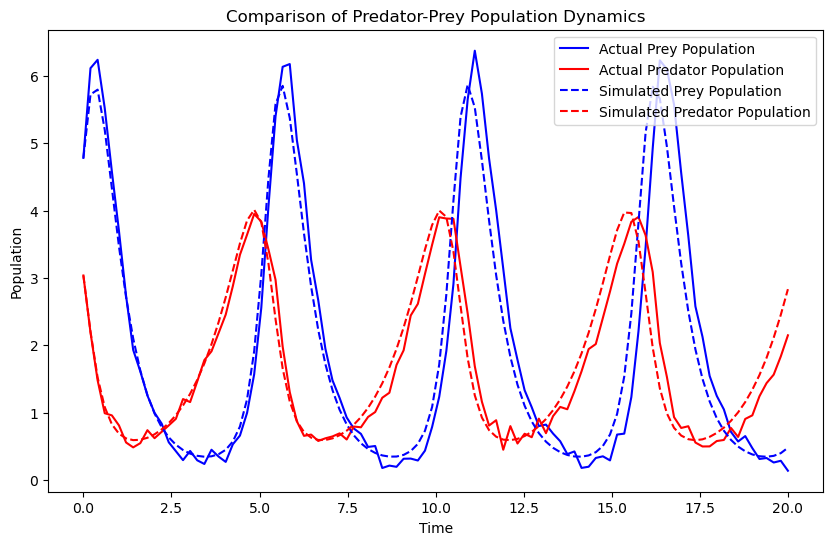

In [ ]:
plot_sim(param,data)

<ErrorbarContainer object of 3 artists>

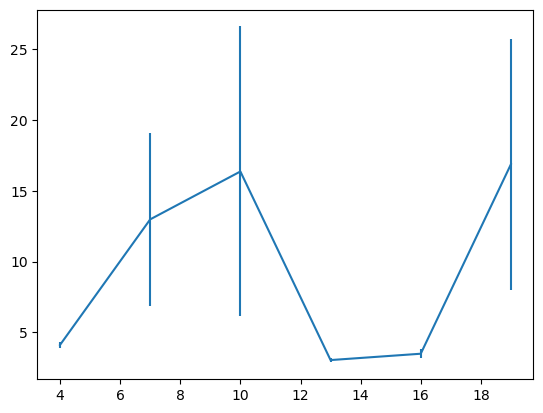

In [ ]:
plt.errorbar(n_dropped_points,mean_errors,y_err=std_errors)

In [117]:
# Example real data (replace with your actual observed data)
time_steps = data['t']
observed_predators = data['x']
observed_prey = data['y']

# Number of simulations
num_simulations = 10

starting = np.array([alpha,beta,delta,gamma])

alpha = -2
print(starting)
# Example simulated data (replace with your actual simulated data)
num_simulations = 5
simulated_populations = [sim_lv(optimize_parameters(data,method = 'hill_climbing', func='mae', i=5000, temp = temp, array= starting), time_steps) for _ in range(num_simulations)]
print(np.shape(simulated_populations))

[-2.         -0.58946135 -0.39533502 -1.46000065]


c:\Users\bruno\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(5, 100, 2)


(100, 2)
[[4.78163509 3.03525736]
 [5.7445859  2.15231844]
 [5.80751333 1.4512899 ]
 [5.13920462 1.01315766]
 [4.21660012 0.76666867]
 [3.31887811 0.6348657 ]
 [2.55664475 0.56411862]
 [1.95078531 0.53513488]
 [1.48596148 0.53617594]
 [1.13645729 0.56032356]
 [0.87680789 0.60450131]
 [0.68081224 0.66786749]
 [0.53379355 0.75100569]
 [0.42891252 0.85551199]
 [0.35506165 0.98377696]
 [0.30457243 1.13885209]
 [0.27246921 1.32432544]
 [0.25602846 1.54412919]
 [0.25470632 1.79102108]
 [0.2705926  2.05965964]
 [0.30978248 2.36323505]
 [0.38557546 2.69876984]
 [0.52548948 3.05481247]
 [0.78579068 3.4017211 ]
 [1.27648411 3.67351223]
 [2.17633316 3.74600888]
 [3.54071576 3.38078183]
 [5.01543967 2.60133148]
 [5.84969873 1.80729812]
 [5.72727708 1.23343242]
 [4.98275454 0.88738179]
 [4.00419016 0.69426266]
 [3.10348206 0.59207102]
 [2.36229078 0.54453482]
 [1.78612653 0.53249154]
 [1.35201371 0.54621969]
 [1.03071935 0.58108896]
 [0.7954478  0.63533212]
 [0.62442042 0.70892447]
 [0.49611698 0.8

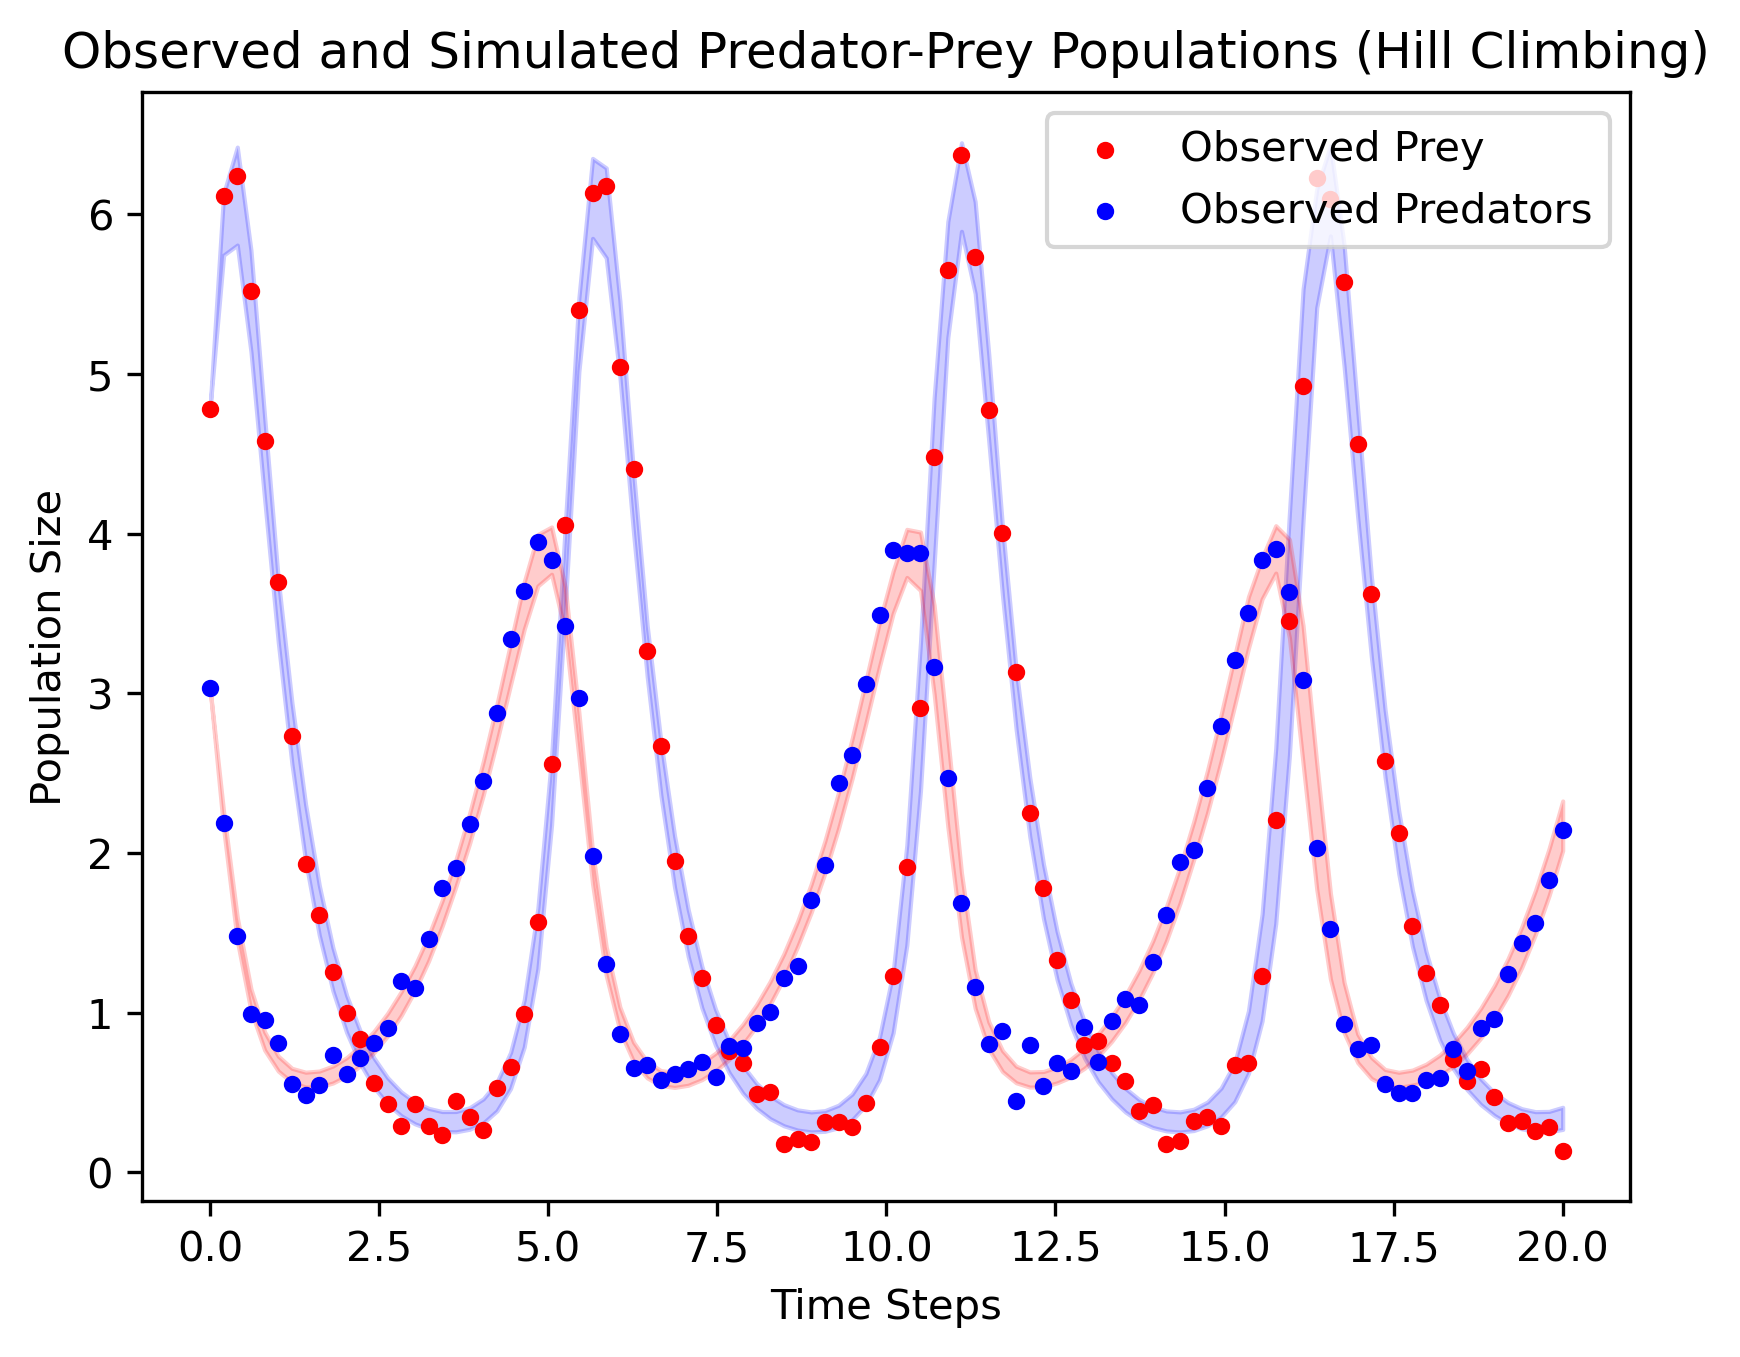

In [118]:
min, max = np.ones(simulated_populations[0].shape)*1000, np.zeros(simulated_populations[0].shape)

print(np.shape(min))
for sim in simulated_populations:
    for idx, (i,j) in enumerate(sim):
        if i < min[idx,0]:
            min[idx,0] = i
        if i > max[idx,0]:
            max[idx,0] = i
        if j > max[idx,1]:
            max[idx,1] = j
        if j < min[idx,1]:
            min[idx,1] = j

print(min)

fig, ax = plt.subplots(dpi=300)
ax.fill_between(time_steps, min[:,0], max[:,0], color='blue', alpha=.2)
ax.fill_between(time_steps, min[:,1], max[:,1], color='red', alpha=.2)
ax.set_title('fill between y1 and 0')

#Plot observed data
plt.scatter(time_steps, observed_predators, label='Observed Prey', color='red',s=10)
plt.scatter(time_steps, observed_prey, label='Observed Predators', color='blue',s=10)	



#Customize plot labels, legend, etc.
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.title('Observed and Simulated Predator-Prey Populations (Hill Climbing)')
plt.legend()
plt.show()